<a href="https://colab.research.google.com/github/EmilSeyfullayev/Credit_Risk_Modeling_in_Python/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [45]:
train = pd.read_csv('/content/drive/MyDrive/Credit Risk Modeling/train_features_selected.csv')
train.head()

,Unnamed: 0,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY_OTHER_NONE_RENT,home_ownership:MORTGAGE,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,addr_state:NE_IA_NV_AL_NM,addr_state:HI_MO_VA,addr_state:OK_TN_NJ_NC_KY,addr_state:MD_UT_LA_MN_MI,addr_state:SD_WA_AZ_OH_PA_MA_AR_DE_IN_GA,addr_state:WI_RI_OR,addr_state:CT_IL,addr_state:MT_KS_CO_SC_AK,addr_state:VT_MS_NH_WV_WY_DC_ME_ID,addr_state:FL,addr_state:CA,addr_state:NY,addr_state:TX,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,since_issue_date:<87,since_issue_date:<90,since_issue_date:<92,...,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_rec:Missing,mths_since_last_rec:0-2,mths_since_last_rec:3-20,mths_since_last_rec:21-31,mths_since_last_rec:32-48,mths_since_last_rec:49-60,mths_since_last_rec:61-84,mths_since_last_rec:84-99,mths_since_last_rec:>100,since_issue_date:<87.1,since_issue_date:<90.1,since_issue_date:<92.1,since_issue_date:<94.1,since_issue_date:<99.1,since_issue_date:<103.1,since_issue_date:<112.1,since_issue_date:<142.1,since_issue_date:>=142.1,term: 36 months,term: 60 months,good_loan
0,161569,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,287448,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,410266,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,453319,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,287547,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [46]:
test = pd.read_csv("/content/drive/MyDrive/Credit Risk Modeling/test_features_selected.csv")

In [47]:
test.head()

,Unnamed: 0,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY_OTHER_NONE_RENT,home_ownership:MORTGAGE,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,addr_state:NE_IA_NV_AL_NM,addr_state:HI_MO_VA,addr_state:OK_TN_NJ_NC_KY,addr_state:MD_UT_LA_MN_MI,addr_state:SD_WA_AZ_OH_PA_MA_AR_DE_IN_GA,addr_state:WI_RI_OR,addr_state:CT_IL,addr_state:MT_KS_CO_SC_AK,addr_state:VT_MS_NH_WV_WY_DC_ME_ID,addr_state:FL,addr_state:CA,addr_state:NY,addr_state:TX,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,since_issue_date:<87,since_issue_date:<90,since_issue_date:<92,...,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_rec:Missing,mths_since_last_rec:0-2,mths_since_last_rec:3-20,mths_since_last_rec:21-31,mths_since_last_rec:32-48,mths_since_last_rec:49-60,mths_since_last_rec:61-84,mths_since_last_rec:84-99,mths_since_last_rec:>100,since_issue_date:<87.1,since_issue_date:<90.1,since_issue_date:<92.1,since_issue_date:<94.1,since_issue_date:<99.1,since_issue_date:<103.1,since_issue_date:<112.1,since_issue_date:<142.1,since_issue_date:>=142.1,term: 36 months,term: 60 months,good_loan
0,362514,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,288564,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,213591,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,263083,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,165001,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [48]:
columns_needed_to_be_dropped = ['Unnamed: 0','since_issue_date:<87',
'since_issue_date:<90', 'since_issue_date:<92',
'since_issue_date:<94', 'since_issue_date:<99',
'since_issue_date:<103', 'since_issue_date:<112',
'since_issue_date:<142', 'since_issue_date:>=142',]

In [49]:
train.drop(columns_needed_to_be_dropped, axis=1, inplace=True)
test.drop(columns_needed_to_be_dropped, axis=1, inplace=True)

In [5]:
# test.columns == train.columns

In [50]:
#train.columns.values

reference_variables = [
'grade:G',
'verification_status:Verified',
'addr_state:NE_IA_NV_AL_NM',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term: 60 months',
'emp_length:0',
'since_issue_date:>=142.1',
'interest_rate:>20.281',
'earl_cr_line:>=437',
'delinq_2yrs:>=12',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0',
'total_acc:<=3',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_rec:0-2'
]

In [51]:
chp_train = train
chp_test = test
train.drop(reference_variables, axis=1, inplace=True)
test.drop(reference_variables, axis=1, inplace=True)

### Modeling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
X_train = train.drop('good_loan', axis=1)
y_train = train['good_loan']
X_test = train.drop('good_loan', axis=1)
y_test = train['good_loan']

In [54]:
lg = LogisticRegression()

In [55]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [56]:
intercept = lg.intercept_
coefficients = lg.coef_

In [57]:
summary_table = pd.DataFrame()
summary_table['feature_name'] = np.array(['intercept'])
summary_table['coefficients'] = intercept
summary_table

,feature_name,coefficients
0,intercept,-1.030944


In [58]:
temp = pd.DataFrame()
temp['feature_name'] = np.array(X_train.columns.values)
temp['coefficients'] = np.array(coefficients[0]) # coefs were in [[]], so we accessed first 
temp

,feature_name,coefficients
0,grade:A,1.226570
1,grade:B,0.971279
2,grade:C,0.771589
3,grade:D,0.571721
4,grade:E,0.377744
...,...,...
109,since_issue_date:<99.1,0.680283
110,since_issue_date:<103.1,0.502187
111,since_issue_date:<112.1,0.245830
112,since_issue_date:<142.1,-0.069288


In [59]:
summary_table = pd.concat([summary_table, temp])
summary_table.reset_index(inplace=True)

In [60]:
splitted_column_names = summary_table['feature_name'].apply(lambda x: str(x).split(":"))

In [61]:
main_name_of_var = []

for i in splitted_column_names:
  main_name_of_var.append(i[0])

summary_table['main_name_of_var'] = main_name_of_var
summary_table = summary_table[['main_name_of_var', 'feature_name', 'coefficients']]
summary_table

,main_name_of_var,feature_name,coefficients
0,intercept,intercept,-1.030944
1,grade,grade:A,1.226570
2,grade,grade:B,0.971279
3,grade,grade:C,0.771589
4,grade,grade:D,0.571721
...,...,...,...
110,since_issue_date,since_issue_date:<99.1,0.680283
111,since_issue_date,since_issue_date:<103.1,0.502187
112,since_issue_date,since_issue_date:<112.1,0.245830
113,since_issue_date,since_issue_date:<142.1,-0.069288


In [62]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [63]:
reg = LogisticRegression_with_p_values()

In [77]:
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<Figure size 1200x800 with 0 Axes>

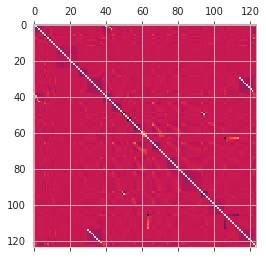

In [41]:
plt.figure(dpi = 200)
plt.matshow(train.corr())

In [ ]:
# plt.figure(dpi = 200)
# corr = train.corr()
# corr.style.background_gradient(cmap='coolwarm') # finally found why we had SingularMatrixError

In [15]:
# reg.fit(X_train, y_train)

In [79]:
p_values = reg.p_values
print(len(p_values))
p_values[:5]

114


[8.287659143816337e-29,
 3.8771007789954185e-41,
 9.10379004736922e-33,
 1.3046935080417496e-20,
 5.6354533107751754e-12]

In [80]:
p_values.insert(0, np.nan)

In [82]:
print(len(p_values))
p_values[:5]

115


[nan,
 8.287659143816337e-29,
 3.8771007789954185e-41,
 9.10379004736922e-33,
 1.3046935080417496e-20]

In [83]:
summary_table['p_values'] = p_values

In [84]:
summary_table

,main_name_of_var,feature_name,coefficients,p_values
0,intercept,intercept,-1.030944,NaN
1,grade,grade:A,1.226570,8.287659e-29
2,grade,grade:B,0.971279,3.877101e-41
3,grade,grade:C,0.771589,9.103790e-33
4,grade,grade:D,0.571721,1.304694e-20
...,...,...,...,...
110,since_issue_date,since_issue_date:<99.1,0.680283,2.527976e-59
111,since_issue_date,since_issue_date:<103.1,0.502187,8.406129e-32
112,since_issue_date,since_issue_date:<112.1,0.245830,3.868279e-09
113,since_issue_date,since_issue_date:<142.1,-0.069288,7.553761e-02


In [117]:
vars_not_significant = []

for index, value in enumerate(summary_table['p_values']):
  if value>0.5:
    vars_not_significant.append(summary_table.iloc[index]['main_name_of_var'])

insignificant_vars = pd.Series(vars_not_significant).value_counts().reset_index()
insignificant_vars

,index,0
0,dti,5
1,open_acc,5
2,total_acc,5
3,delinq_2yrs,3
4,verification_status,1
5,mths_since_last_rec,1
6,purpose,1
7,addr_state,1
8,earl_cr_line,1
9,annual_inc,1


In [118]:
count_of_main_vars = summary_table['main_name_of_var'].value_counts().reset_index()
count_of_main_vars_needed = count_of_main_vars[count_of_main_vars['index'].isin(list(insignificant_vars['index']))]

In [119]:
count_of_main_vars_needed

,index,main_name_of_var
0,addr_state,12
1,annual_inc,11
2,dti,9
5,open_acc,8
6,mths_since_last_rec,8
7,total_acc,7
9,earl_cr_line,5
13,delinq_2yrs,3
16,verification_status,2
18,purpose,2


In [120]:
insignificant_vars['index'] = pd.Categorical(insignificant_vars['index'], ordered=True, 
                                             categories = count_of_main_vars_needed['index'])

In [121]:
count_of_main_vars_needed['index'] = pd.Categorical(count_of_main_vars_needed['index'], ordered=True,
                                                    categories = count_of_main_vars_needed['index'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
count_of_main_vars_needed.reset_index(drop=True, inplace=True)

In [138]:
insignificant_vars = insignificant_vars.sort_values("index").reset_index(drop=True)

In [141]:
insignificant_vars

,index,0
0,addr_state,1
1,annual_inc,1
2,dti,5
3,open_acc,5
4,mths_since_last_rec,1
5,total_acc,5
6,earl_cr_line,1
7,delinq_2yrs,3
8,verification_status,1
9,purpose,1


In [139]:
count_of_main_vars_needed = count_of_main_vars_needed.sort_values("index")

In [142]:
count_of_main_vars_needed

,index,main_name_of_var
0,addr_state,12
1,annual_inc,11
2,dti,9
3,open_acc,8
4,mths_since_last_rec,8
5,total_acc,7
6,earl_cr_line,5
7,delinq_2yrs,3
8,verification_status,2
9,purpose,2


In [143]:
temp_p_values = pd.concat([insignificant_vars, count_of_main_vars_needed], axis=1)
temp_p_values 

,index,0,index,main_name_of_var
0,addr_state,1,addr_state,12
1,annual_inc,1,annual_inc,11
2,dti,5,dti,9
3,open_acc,5,open_acc,8
4,mths_since_last_rec,1,mths_since_last_rec,8
5,total_acc,5,total_acc,7
6,earl_cr_line,1,earl_cr_line,5
7,delinq_2yrs,3,delinq_2yrs,3
8,verification_status,1,verification_status,2
9,purpose,1,purpose,2


In [145]:
temp_p_values.columns.values[1] = 'count_of_insignificant'
temp_p_values

,index,count_of_insignificant,index,main_name_of_var
0,addr_state,1,addr_state,12
1,annual_inc,1,annual_inc,11
2,dti,5,dti,9
3,open_acc,5,open_acc,8
4,mths_since_last_rec,1,mths_since_last_rec,8
5,total_acc,5,total_acc,7
6,earl_cr_line,1,earl_cr_line,5
7,delinq_2yrs,3,delinq_2yrs,3
8,verification_status,1,verification_status,2
9,purpose,1,purpose,2


In [147]:
temp_p_values['proportion_of_insignificant'] = round(temp_p_values['count_of_insignificant']/temp_p_values['main_name_of_var']*100)
temp_p_values

,index,count_of_insignificant,index,main_name_of_var,proportion_of_insignificant
0,addr_state,1,addr_state,12,8.0
1,annual_inc,1,annual_inc,11,9.0
2,dti,5,dti,9,56.0
3,open_acc,5,open_acc,8,62.0
4,mths_since_last_rec,1,mths_since_last_rec,8,12.0
5,total_acc,5,total_acc,7,71.0
6,earl_cr_line,1,earl_cr_line,5,20.0
7,delinq_2yrs,3,delinq_2yrs,3,100.0
8,verification_status,1,verification_status,2,50.0
9,purpose,1,purpose,2,50.0
